# Aim 
The aim of this project is to develop a predictive model that can accurately predict the likelihood of an individual 
developing heart disease based on a set of relevant features such as age, gender, blood pressure, cholesterol levels, etc.
By leveraging machine learning techniques, the goal is to assist healthcare professionals in early detection 
and prevention strategies for heart disease. 

# Objective 
Develop a predictive model for heart disease using machine learning techniques to accurately identify individuals at risk, enabling early intervention and improved patient outcomes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\ADMIN\\Downloads'

In [3]:
#importing data
df=pd.read_csv(r"heart_disease_prediction.csv") 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,No,0.0,Up,Absence
1,49,F,NAP,160,180,Normal,156,No,1.0,Flat,Presence
2,37,M,ATA,130,283,ST,98,No,0.0,Up,Absence
3,48,F,ASY,138,214,Normal,108,Yes,1.5,Flat,Presence
4,54,M,NAP,150,195,Normal,122,No,0.0,Up,Absence
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,Normal,132,No,1.2,Flat,Presence
914,68,M,ASY,144,193,Normal,141,No,3.4,Flat,Presence
915,57,M,ASY,130,131,Normal,115,Yes,1.2,Flat,Presence
916,57,F,ATA,130,236,LVH,174,No,0.0,Flat,Presence


In [4]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    object 
 4   Cholesterol     918 non-null    object 
 5   RestingECG      918 non-null    object 
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    object 
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    object 
 10  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 79.0+ KB


In [5]:
df["RestingBP"].value_counts()

RestingBP
120    131
130    116
140    105
110     57
150     54
      ... 
113      1
0        1
92       1
98       1
164      1
Name: count, Length: 68, dtype: int64


Need to show there is ? present in data

In [6]:
df[df["RestingBP"]=="?"]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
9,48,F,ATA,?,284,Normal,120,No,0.0,Up,Absence
11,58,M,ATA,?,164,ST,99,Yes,2.0,Flat,Presence
16,38,M,ASY,?,?,Normal,166,No,0.0,Flat,Presence
23,44,M,ATA,?,288,Normal,150,Yes,3.0,Flat,Presence
24,40,M,NAP,?,215,Normal,138,No,0.0,Up,Absence
47,50,M,ATA,?,216,Normal,170,No,0.0,Up,Absence
52,45,M,ATA,?,224,Normal,122,No,0.0,Up,Absence
54,52,F,ASY,?,180,Normal,140,Yes,1.5,Flat,Absence


In [7]:
df[df["Cholesterol"]=="?"]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
16,38,M,ASY,?,?,Normal,166,No,0.0,Flat,Presence
21,44,M,ATA,120,?,Normal,142,No,1.0,Flat,Absence
25,36,M,NAP,130,?,Normal,178,No,0.0,Up,Absence
65,37,F,ATA,120,?,Normal,130,No,0.0,Up,Absence
67,32,M,ATA,110,?,Normal,184,No,0.0,Up,Absence
99,41,M,ATA,125,?,Normal,144,No,0.0,Up,Absence
101,51,M,ASY,130,?,Normal,100,No,0.0,Up,Absence


In [8]:
#replacing ? with nan
df["RestingBP"].replace("?", np.nan,inplace= True)
df["Cholesterol"].replace("?", np.nan,inplace= True)

In [9]:
#converting datatype of both columns to float
df["RestingBP"] = df["RestingBP"].astype("float64")
df["Cholesterol"] = df["Cholesterol"].astype("float64")


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,910.000000,911.000000,918.000000,918.000000
mean,53.510893,132.400000,198.656422,136.809368,0.887364
std,9.432617,18.562723,109.753487,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,172.500000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [11]:
oldpeak_0_removal=df["Oldpeak"]._get_numeric_data()
df["Oldpeak"][oldpeak_0_removal<0]=0

In [12]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,Normal,172,No,0.0,Up,Absence
1,49,F,NAP,160.0,180.0,Normal,156,No,1.0,Flat,Presence
2,37,M,ATA,130.0,283.0,ST,98,No,0.0,Up,Absence
3,48,F,ASY,138.0,214.0,Normal,108,Yes,1.5,Flat,Presence
4,54,M,NAP,150.0,195.0,Normal,122,No,0.0,Up,Absence
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,Normal,132,No,1.2,Flat,Presence
914,68,M,ASY,144.0,193.0,Normal,141,No,3.4,Flat,Presence
915,57,M,ASY,130.0,131.0,Normal,115,Yes,1.2,Flat,Presence
916,57,F,ATA,130.0,236.0,LVH,174,No,0.0,Flat,Presence


In [13]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,910.000000,911.000000,918.000000,918.000000
mean,53.510893,132.400000,198.656422,136.809368,0.901307
std,9.432617,18.562723,109.753487,25.460334,1.045100
min,28.000000,0.000000,0.000000,60.000000,0.000000
25%,47.000000,120.000000,172.500000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


As Blood pressure and cholestrol of human can not be zero, replacing 0 by nan

In [14]:
df["RestingBP"].replace(0, np.nan, inplace=True)

In [15]:
df[df["RestingBP"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [16]:
df[df["Cholesterol"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115.0,0.0,Normal,93,Yes,0.0,Flat,Presence
294,32,M,TA,95.0,0.0,Normal,127,No,0.7,Up,Presence
295,61,M,ASY,105.0,0.0,Normal,110,Yes,1.5,Up,Presence
296,50,M,ASY,145.0,0.0,Normal,139,Yes,0.7,Flat,Presence
297,57,M,ASY,110.0,0.0,ST,131,Yes,1.4,Up,Presence
...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122.0,0.0,Normal,120,No,0.5,Up,Presence
515,63,M,NAP,130.0,0.0,ST,160,No,3.0,Flat,Absence
518,48,M,NAP,102.0,0.0,ST,110,Yes,1.0,Down,Presence
535,56,M,ASY,130.0,0.0,LVH,122,Yes,1.0,Flat,Presence


In [17]:
df["Cholesterol"].replace(0, np.nan, inplace=True)

In [18]:
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           9
Cholesterol       179
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

# Replacing Nan values by mean of the column

In [19]:
df["RestingBP"].replace(np.nan,df["RestingBP"].mean(),inplace=True)

In [20]:
df["Cholesterol"].replace(np.nan,df["Cholesterol"].mean(),inplace=True)

In [21]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Visualization

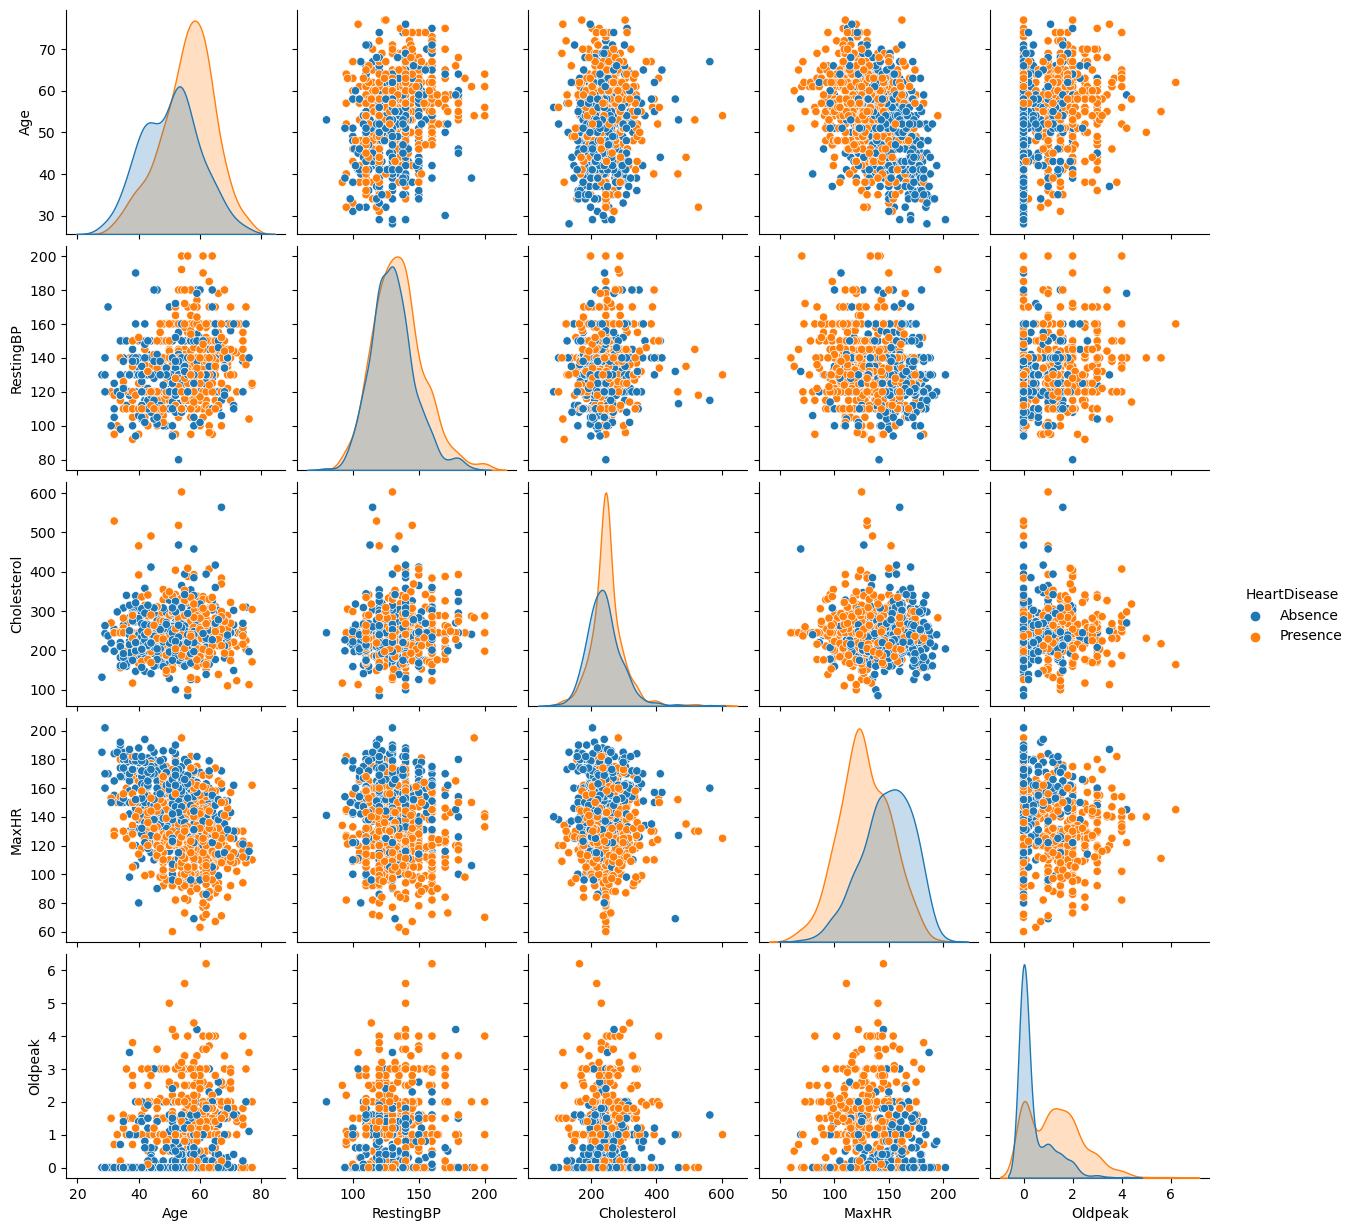

In [22]:
sns.pairplot(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']], hue='HeartDisease')
plt.show()

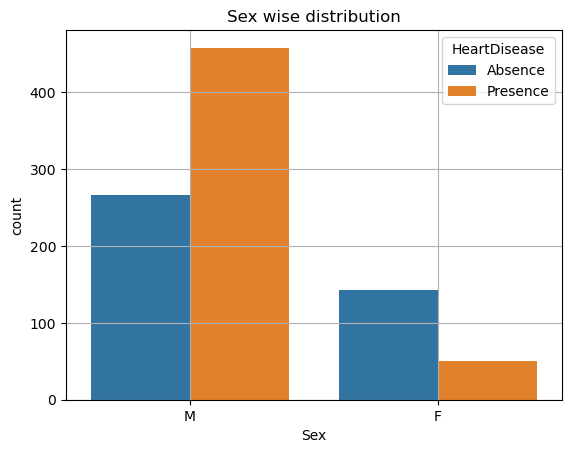

In [23]:
sns.countplot(x=df['Sex'], hue=df['HeartDisease'])
plt.title('Sex wise distribution')
plt.grid()
plt.show()

Males tends more to have heart diseas than the females

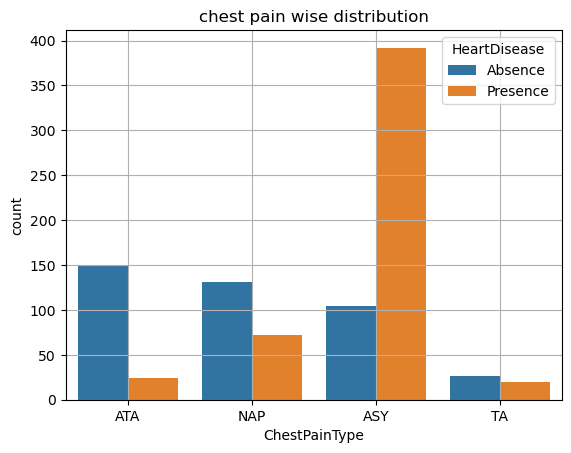

In [24]:
sns.countplot(x=df['ChestPainType'], hue=df['HeartDisease'])
plt.title('chest pain wise distribution')
plt.grid()
plt.show()

peoples that have Atypical aginal pain(Pressure or squzeeing) that is ATA have higher percentage of not having heart diseas

where as if person is having Non aginal pain that is pain not related to heart might be having heart diseas 
but mostly in such cases heart diseas is not present

If a person is having a symptomatic pain that might be the case of heart diseas

and peoples with Typical aginal pain( heavyness,tightness) might have heart diseas or might not have it.

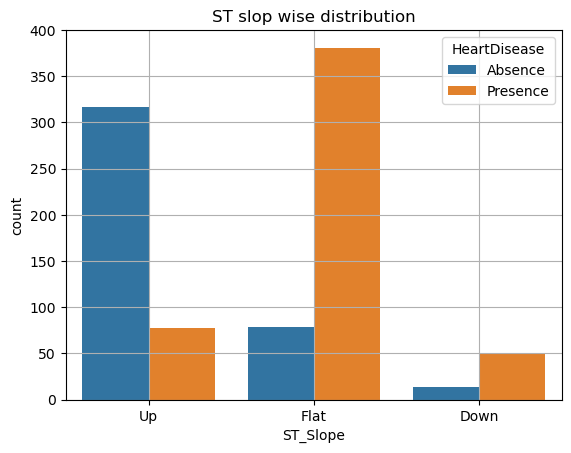

In [25]:
sns.countplot(x=df['ST_Slope'], hue=df['HeartDisease'])
plt.title('ST slop wise distribution')
plt.grid()
plt.show()


Most importantly if a persons st slope from the ECG is high after the workout then it might not be the case of heart diseas but,
if the st slop is normal or going down after workout then it might be the case of heart diseas.

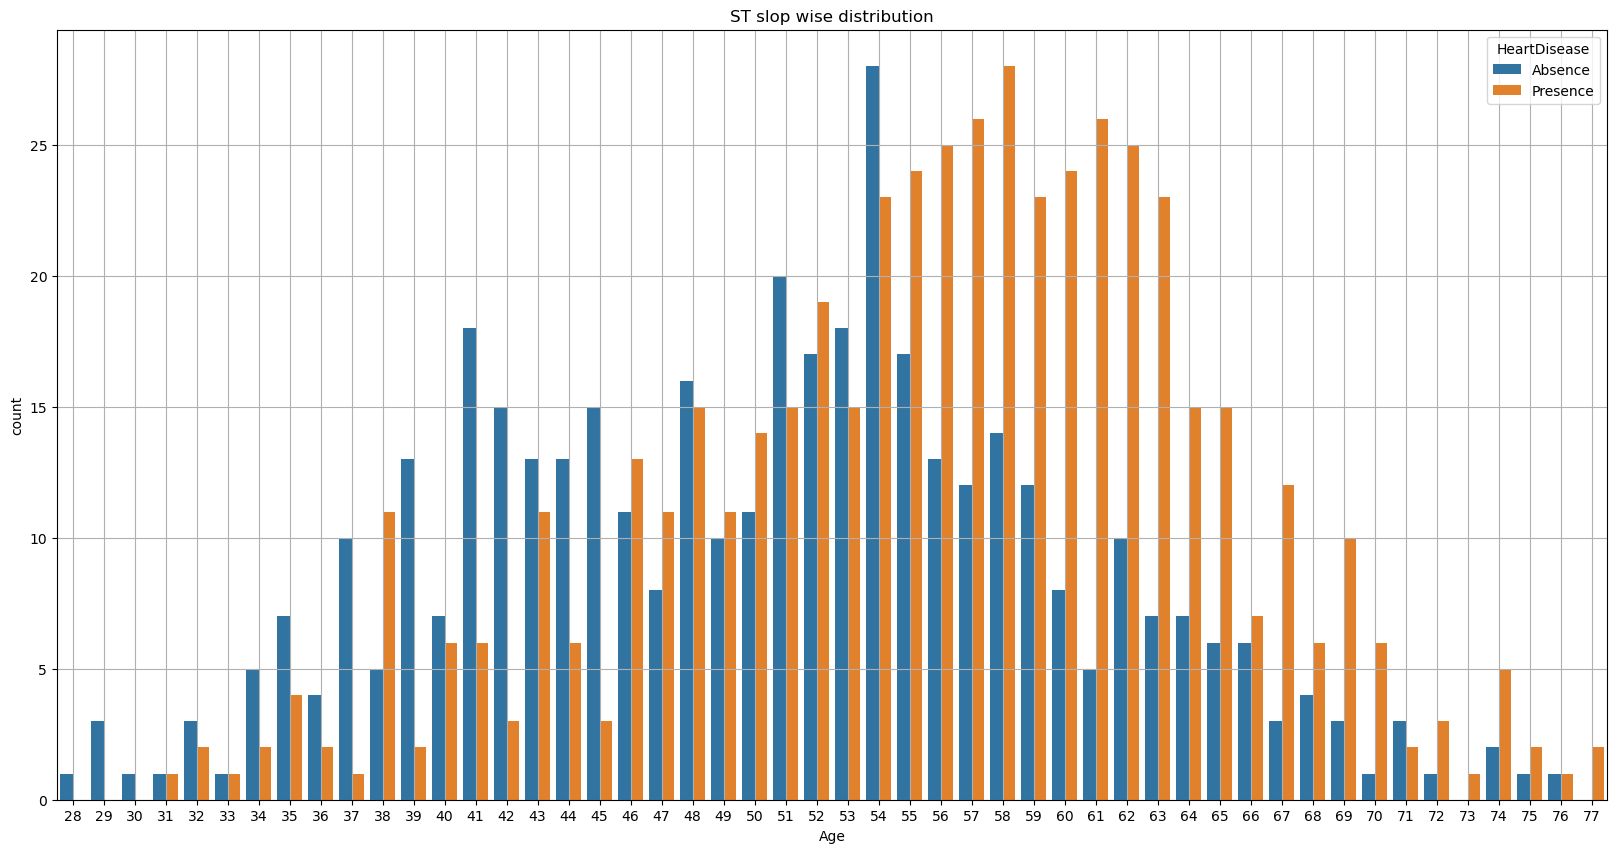

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Age'], hue=df['HeartDisease'])
plt.title('ST slop wise distribution')
plt.grid()
plt.show()

after the age 50 more no of peoples tends to have heart problems.

By analyzing the heatmap patterns and correlations can be observed, aiding in the prediction and understanding of heart disease.

# Separating numerical and catagorical data

In [35]:
df_num=df.select_dtypes(['int','float'])
df_num

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140.0,289.0,172,0.0
1,49,160.0,180.0,156,1.0
2,37,130.0,283.0,98,0.0
3,48,138.0,214.0,108,1.5
4,54,150.0,195.0,122,0.0
...,...,...,...,...,...
913,45,110.0,264.0,132,1.2
914,68,144.0,193.0,141,3.4
915,57,130.0,131.0,115,1.2
916,57,130.0,236.0,174,0.0


In [36]:
df_cat=df.select_dtypes(['object'])
df_cat

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,Normal,No,Up,Absence
1,F,NAP,Normal,No,Flat,Presence
2,M,ATA,ST,No,Up,Absence
3,F,ASY,Normal,Yes,Flat,Presence
4,M,NAP,Normal,No,Up,Absence
...,...,...,...,...,...,...
913,M,TA,Normal,No,Flat,Presence
914,M,ASY,Normal,No,Flat,Presence
915,M,ASY,Normal,Yes,Flat,Presence
916,F,ATA,LVH,No,Flat,Presence


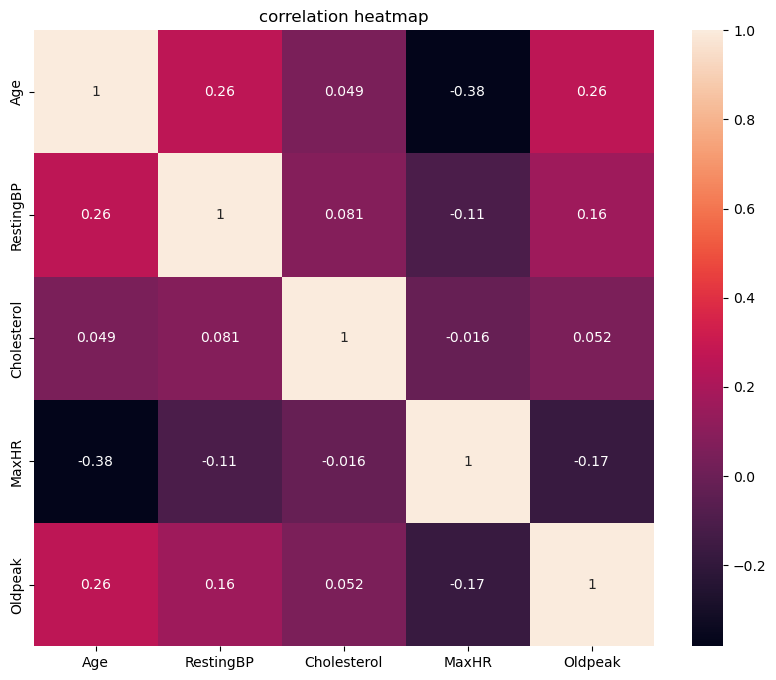

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(),annot=True)
plt.title('correlation heatmap')
plt.show()

# Label encoding catagorical columns

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_cat:
    df_cat[i] = le.fit_transform(df_cat[i])
df_cat


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,1,1,1,0,2,0
1,0,2,1,0,1,1
2,1,1,2,0,2,0
3,0,0,1,1,1,1
4,1,2,1,0,2,0
...,...,...,...,...,...,...
913,1,3,1,0,1,1
914,1,0,1,0,1,1
915,1,0,1,1,1,1
916,0,1,0,0,1,1


In [38]:
numerical = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
df_num[numerical] = norm.fit_transform(df_num[numerical])
df_num

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.244898,0.500000,0.393822,0.788732,0.000000
1,0.428571,0.666667,0.183398,0.676056,0.161290
2,0.183673,0.416667,0.382239,0.267606,0.000000
3,0.408163,0.483333,0.249035,0.338028,0.241935
4,0.530612,0.583333,0.212355,0.436620,0.000000
...,...,...,...,...,...
913,0.346939,0.250000,0.345560,0.507042,0.193548
914,0.816327,0.533333,0.208494,0.570423,0.548387
915,0.591837,0.416667,0.088803,0.387324,0.193548
916,0.591837,0.416667,0.291506,0.802817,0.000000


In [39]:
df_new=pd.concat([df_cat,df_num],axis=1)
df_new

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,1,1,1,0,2,0,0.244898,0.500000,0.393822,0.788732,0.000000
1,0,2,1,0,1,1,0.428571,0.666667,0.183398,0.676056,0.161290
2,1,1,2,0,2,0,0.183673,0.416667,0.382239,0.267606,0.000000
3,0,0,1,1,1,1,0.408163,0.483333,0.249035,0.338028,0.241935
4,1,2,1,0,2,0,0.530612,0.583333,0.212355,0.436620,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,1,0.346939,0.250000,0.345560,0.507042,0.193548
914,1,0,1,0,1,1,0.816327,0.533333,0.208494,0.570423,0.548387
915,1,0,1,1,1,1,0.591837,0.416667,0.088803,0.387324,0.193548
916,0,1,0,0,1,1,0.591837,0.416667,0.291506,0.802817,0.000000


# Separating & assigning features and target columns to x & y respectively

In [40]:
x=df_new.drop('HeartDisease',axis=1)
x

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,1,1,1,0,2,0.244898,0.500000,0.393822,0.788732,0.000000
1,0,2,1,0,1,0.428571,0.666667,0.183398,0.676056,0.161290
2,1,1,2,0,2,0.183673,0.416667,0.382239,0.267606,0.000000
3,0,0,1,1,1,0.408163,0.483333,0.249035,0.338028,0.241935
4,1,2,1,0,2,0.530612,0.583333,0.212355,0.436620,0.000000
...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,0.346939,0.250000,0.345560,0.507042,0.193548
914,1,0,1,0,1,0.816327,0.533333,0.208494,0.570423,0.548387
915,1,0,1,1,1,0.591837,0.416667,0.088803,0.387324,0.193548
916,0,1,0,0,1,0.591837,0.416667,0.291506,0.802817,0.000000


In [41]:
y=df_new['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int32

# Applying different Machine Learning algorithms

In [ ]:
# import important libraries

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Split the data into training and testing sets

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
rf = RandomForestClassifier(random_state=42)

# Defining a function for applying different models

In [45]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model


# Logistic Regression

In [46]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       112
           1       0.91      0.81      0.86       164

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.84       276



LogisticRegression()

# Hypertuning of Logistic regression

In [47]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    # C is the Regularization Parameter #Techinque to convert overfit to good fit is Regularization 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [48]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

In [49]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [50]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [51]:
accuracy_GS_train= grid_search.score(x_train, y_train)
accuracy_GS_train

0.8457943925233645

In [52]:
accuracy_GS_test= grid_search.score(x_test, y_test)
accuracy_GS_test

0.8405797101449275

# KNeighbors Classifier

In [53]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       112
           1       0.92      0.82      0.87       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



KNeighborsClassifier()

# Hypertuning KNN

In [54]:
param_grid = {'n_neighbors':list(range(1,51)), 'weights': ['uniform', 'distance'],'algorithm':['kd_tree', 'ball_tree', 'brute', 'auto']}

In [55]:
knn_grid = GridSearchCV(knn, param_grid)

In [56]:
knn_grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'ball_tree', 'brute', 'auto'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']})

In [57]:
knn_grid.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 12, 'weights': 'uniform'}

In [58]:
knn1 = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=12, weights='uniform')

In [59]:
mymodel(knn1)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       112
           1       0.91      0.84      0.87       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



KNeighborsClassifier(algorithm='kd_tree', n_neighbors=12)

# Support Vector Machines (SVM)

In [60]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       112
           1       0.91      0.83      0.87       164

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.85      0.85       276



SVC()

# Hypertuning of SVM

In [61]:
param_grid = {'C': [0.001,0.01, 0.1,1,10], 'gamma': [0.001,0.01,0.1,1,10,100], 'kernel': ['linear','poly', 'rbf']}

In [62]:
gs_svm = GridSearchCV(svm,param_grid,verbose=3)

In [63]:
gs_svm.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.535 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.535 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.539 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.539 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.531 total time=   0.0s
[CV 1/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 2/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 3/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.539 total time=   0.0s
[CV 4/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.539 total time=   0.0s
[CV 5/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.531 total time=   0.0s
[CV 1/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 2/5] END ..C=0.001, gamma=0.001, kerne

[CV 2/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 3/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.539 total time=   0.1s
[CV 4/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.539 total time=   0.1s
[CV 5/5] END ...C=0.01, gamma=0.001, kernel=rbf;, score=0.531 total time=   0.1s
[CV 1/5] END .C=0.01, gamma=0.01, kernel=linear;, score=0.822 total time=   0.0s
[CV 2/5] END .C=0.01, gamma=0.01, kernel=linear;, score=0.837 total time=   0.0s
[CV 3/5] END .C=0.01, gamma=0.01, kernel=linear;, score=0.852 total time=   0.0s
[CV 4/5] END .C=0.01, gamma=0.01, kernel=linear;, score=0.844 total time=   0.0s
[CV 5/5] END .C=0.01, gamma=0.01, kernel=linear;, score=0.773 total time=   0.0s
[CV 1/5] END ...C=0.01, gamma=0.01, kernel=poly;, score=0.535 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=0.01, kernel=poly;, score=0.535 total time=   0.0s
[CV 3/5] END ...C=0.01, gamma=0.01, kernel=poly;, score=0.539 total time=   0.0s
[CV 4/5] END ...C=0.01, gamm

[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.674 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.566 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.617 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.641 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.609 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.876 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.829 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.820 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.789 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.797 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.868 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.829 total time=   0.0s
[CV 3/5] END .....C=0.1, gam

[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.828 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.828 total time=   0.0s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.845 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.828 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.789 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.820 total time=   0.0s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.837 total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.860 total time=   0.0s
[CV 3/5] END .........C=1, g

[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.805 total time=   0.5s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.727 total time=   0.3s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.758 total time=   0.4s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.805 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.789 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.797 total time=   0.0s
[CV 1/5] END .....C=10, gamma=10, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END .....C=10, gamma=10, kernel=linear;, score=0.845 total time=   0.0s
[CV 3/5] END .....C=10, gamma=10, kernel=linear;, score=0.859 total time=   0.0s
[CV 4/5] END .....C=10, gamma=10, kernel=linear;, score=0.789 total time=   0.0s
[CV 5/5] END .....C=10, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [64]:
gs_svm.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [65]:
svm1 = SVC(C=1, gamma=1, kernel='rbf')
mymodel(svm1)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       112
           1       0.91      0.83      0.87       164

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.85      0.85       276



SVC(C=1, gamma=1)

# Decision Trees

In [66]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.62      0.77      0.69       112
           1       0.81      0.68      0.74       164

    accuracy                           0.71       276
   macro avg       0.71      0.72      0.71       276
weighted avg       0.73      0.71      0.72       276



DecisionTreeClassifier()

# Hypertuning of DT

In [67]:
parameters={'max_depth':['none',10,20,30,40],'min_samples_split':[2,3,4,5,6,7,8,10,11],'min_samples_leaf':[1,2,3,4,5,6,7]}
gs_dt=GridSearchCV(dt,parameters,verbose=4) 

In [68]:
mymodel(gs_dt)

Fitting 5 folds for each of 315 candidates, totalling 1575 fits
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_sam

[CV 2/5] END max_depth=none, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_samples_leaf=3, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END max_depth=none, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_samples_leaf=3, min_samples_split=3;, score=nan total time=   0.0s
[CV 1/5] END max_depth=none, min_samples_leaf=3, min_samples_split=4;, score=nan total time=   0.0s


[CV 1/5] END max_depth=none, min_samples_leaf=5, min_samples_split=8;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=5, min_samples_split=8;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=5, min_samples_split=8;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=5, min_samples_split=8;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_samples_leaf=5, min_samples_split=8;, score=nan total time=   0.0s
[CV 1/5] END max_depth=none, min_samples_leaf=5, min_samples_split=10;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=5, min_samples_split=10;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=5, min_samples_split=10;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=5, min_samples_split=10;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_samples_leaf=5, min_samples_split=10;, score=nan total time=   

[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.829 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.781 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.742 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.820 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3;, score=0.791 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3;, score=0.822 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3;, score=0.773 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3;, score=0.742 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3;, score=0.789 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=4;, score=0.767 total time=   0.0s


[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=10;, score=0.734 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=11;, score=0.798 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=11;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=11;, score=0.758 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=11;, score=0.758 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=11;, score=0.742 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2;, score=0.845 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2;, score=0.822 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2;, score=0.766 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2;, score=0.727 total time=  

[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=11;, score=0.781 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=11;, score=0.711 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.798 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.766 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.789 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.734 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=3;, score=0.798 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=3;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=3;, score=0.750 total time=   0.0

[CV 5/5] END max_depth=10, min_samples_leaf=7, min_samples_split=3;, score=0.766 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=7, min_samples_split=4;, score=0.806 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=7, min_samples_split=4;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=7, min_samples_split=4;, score=0.773 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=7, min_samples_split=4;, score=0.812 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=7, min_samples_split=4;, score=0.781 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=7, min_samples_split=5;, score=0.806 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=7, min_samples_split=5;, score=0.806 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=7, min_samples_split=5;, score=0.766 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=7, min_samples_split=5;, score=0.812 total time=   0.0s


[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5;, score=0.744 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5;, score=0.829 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5;, score=0.781 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5;, score=0.750 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=5;, score=0.727 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=6;, score=0.798 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=6;, score=0.806 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=6;, score=0.797 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=6;, score=0.758 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=6;, score=0.734 total time=   0.0s


[CV 5/5] END max_depth=20, min_samples_leaf=4, min_samples_split=5;, score=0.719 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.791 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.829 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.758 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.758 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.719 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=4, min_samples_split=7;, score=0.791 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=4, min_samples_split=7;, score=0.829 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=4, min_samples_split=7;, score=0.758 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=4, min_samples_split=7;, score=0.758 total time=   0.0s


[CV 2/5] END max_depth=20, min_samples_leaf=6, min_samples_split=7;, score=0.806 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=6, min_samples_split=7;, score=0.758 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=6, min_samples_split=7;, score=0.812 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=6, min_samples_split=7;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=6, min_samples_split=8;, score=0.806 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=6, min_samples_split=8;, score=0.806 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=6, min_samples_split=8;, score=0.766 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=6, min_samples_split=8;, score=0.812 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=6, min_samples_split=8;, score=0.766 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=6, min_samples_split=10;, score=0.806 total time=   0.0s

[CV 2/5] END max_depth=30, min_samples_leaf=1, min_samples_split=10;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=1, min_samples_split=10;, score=0.766 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=1, min_samples_split=10;, score=0.734 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=1, min_samples_split=10;, score=0.773 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=1, min_samples_split=11;, score=0.791 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=1, min_samples_split=11;, score=0.829 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=1, min_samples_split=11;, score=0.766 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=1, min_samples_split=11;, score=0.734 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=1, min_samples_split=11;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=2, min_samples_split=2;, score=0.806 total time

[CV 4/5] END max_depth=30, min_samples_leaf=3, min_samples_split=7;, score=0.742 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=3, min_samples_split=7;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=3, min_samples_split=8;, score=0.845 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=3, min_samples_split=8;, score=0.829 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=3, min_samples_split=8;, score=0.781 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=3, min_samples_split=8;, score=0.742 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=3, min_samples_split=8;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=3, min_samples_split=10;, score=0.822 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=3, min_samples_split=10;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=3, min_samples_split=10;, score=0.781 total time=   0.

[CV 1/5] END max_depth=30, min_samples_leaf=5, min_samples_split=7;, score=0.798 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=5, min_samples_split=7;, score=0.806 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=5, min_samples_split=7;, score=0.750 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=5, min_samples_split=7;, score=0.773 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=5, min_samples_split=7;, score=0.727 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=5, min_samples_split=8;, score=0.798 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=5, min_samples_split=8;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=5, min_samples_split=8;, score=0.766 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=5, min_samples_split=8;, score=0.789 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=5, min_samples_split=8;, score=0.734 total time=   0.0s


[CV 2/5] END max_depth=30, min_samples_leaf=7, min_samples_split=10;, score=0.806 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=7, min_samples_split=10;, score=0.773 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=7, min_samples_split=10;, score=0.812 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=7, min_samples_split=10;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=7, min_samples_split=11;, score=0.806 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=7, min_samples_split=11;, score=0.806 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=7, min_samples_split=11;, score=0.781 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=7, min_samples_split=11;, score=0.812 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=7, min_samples_split=11;, score=0.781 total time=   0.0s
[CV 1/5] END max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.806 total time

[CV 5/5] END max_depth=40, min_samples_leaf=2, min_samples_split=8;, score=0.750 total time=   0.0s
[CV 1/5] END max_depth=40, min_samples_leaf=2, min_samples_split=10;, score=0.791 total time=   0.0s
[CV 2/5] END max_depth=40, min_samples_leaf=2, min_samples_split=10;, score=0.829 total time=   0.0s
[CV 3/5] END max_depth=40, min_samples_leaf=2, min_samples_split=10;, score=0.750 total time=   0.0s
[CV 4/5] END max_depth=40, min_samples_leaf=2, min_samples_split=10;, score=0.750 total time=   0.0s
[CV 5/5] END max_depth=40, min_samples_leaf=2, min_samples_split=10;, score=0.734 total time=   0.0s
[CV 1/5] END max_depth=40, min_samples_leaf=2, min_samples_split=11;, score=0.798 total time=   0.0s
[CV 2/5] END max_depth=40, min_samples_leaf=2, min_samples_split=11;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=40, min_samples_leaf=2, min_samples_split=11;, score=0.758 total time=   0.0s
[CV 4/5] END max_depth=40, min_samples_leaf=2, min_samples_split=11;, score=0.750 total time

[CV 4/5] END max_depth=40, min_samples_leaf=4, min_samples_split=8;, score=0.758 total time=   0.0s
[CV 5/5] END max_depth=40, min_samples_leaf=4, min_samples_split=8;, score=0.727 total time=   0.0s
[CV 1/5] END max_depth=40, min_samples_leaf=4, min_samples_split=10;, score=0.791 total time=   0.0s
[CV 2/5] END max_depth=40, min_samples_leaf=4, min_samples_split=10;, score=0.829 total time=   0.0s
[CV 3/5] END max_depth=40, min_samples_leaf=4, min_samples_split=10;, score=0.758 total time=   0.0s
[CV 4/5] END max_depth=40, min_samples_leaf=4, min_samples_split=10;, score=0.781 total time=   0.0s
[CV 5/5] END max_depth=40, min_samples_leaf=4, min_samples_split=10;, score=0.711 total time=   0.0s
[CV 1/5] END max_depth=40, min_samples_leaf=4, min_samples_split=11;, score=0.791 total time=   0.0s
[CV 2/5] END max_depth=40, min_samples_leaf=4, min_samples_split=11;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=40, min_samples_leaf=4, min_samples_split=11;, score=0.758 total time=

[CV 2/5] END max_depth=40, min_samples_leaf=6, min_samples_split=7;, score=0.806 total time=   0.0s
[CV 3/5] END max_depth=40, min_samples_leaf=6, min_samples_split=7;, score=0.773 total time=   0.0s
[CV 4/5] END max_depth=40, min_samples_leaf=6, min_samples_split=7;, score=0.812 total time=   0.0s
[CV 5/5] END max_depth=40, min_samples_leaf=6, min_samples_split=7;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=40, min_samples_leaf=6, min_samples_split=8;, score=0.814 total time=   0.0s
[CV 2/5] END max_depth=40, min_samples_leaf=6, min_samples_split=8;, score=0.806 total time=   0.0s
[CV 3/5] END max_depth=40, min_samples_leaf=6, min_samples_split=8;, score=0.758 total time=   0.0s
[CV 4/5] END max_depth=40, min_samples_leaf=6, min_samples_split=8;, score=0.812 total time=   0.0s
[CV 5/5] END max_depth=40, min_samples_leaf=6, min_samples_split=8;, score=0.758 total time=   0.0s
[CV 1/5] END max_depth=40, min_samples_leaf=6, min_samples_split=10;, score=0.845 total time=   0.0s

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': ['none', 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10, 11]},
             verbose=4)

In [69]:
gs_dt.best_params_

{'max_depth': 40, 'min_samples_leaf': 6, 'min_samples_split': 5}

# Random forest

In [70]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       112
           1       0.91      0.84      0.87       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



RandomForestClassifier(random_state=42)

# Xgboost classifier

In [71]:
#XGBoost Regression model
from xgboost import XGBClassifier

In [72]:
xgb=XGBClassifier()

In [73]:
mymodel(xgb)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       112
           1       0.89      0.83      0.86       164

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Conclusion:
 In this project, we successfully applied different machine learning algorithms,
 -->>Logistic Regression=84, KNeighbors Classifier=86,Decision Tree=73,Support vector classifier=85,Random Forest     Classifier=86,Xg Boost=84,
 Each model was evaluated based on accuracy and other relevant metrics. The Decision Tree model & KNN showed the 
 highest accuracy amongs all the models.